#LGBM & XGBM

**Objective:**
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset.

**Exploratory Data Analysis (EDA):**
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.

**Data Preprocessing:**
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding.
3.	If needed you can apply more preprocessing methods on the given dataset.

**Building Predictive Models:**
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

**Comparative Analysis:**
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

**Submission Requirements:**

- Well-commented code explaining each step of the analysis.
- Visualizations with appropriate titles and labels.
- A brief report summarizing the comparative analysis results and practical implications.


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
# Load the datasets
train_data = pd.read_csv(r'/content/Titanic_train.csv')
test_data = pd.read_csv(r'/content/Titanic_test.csv')

# Display the first few rows of the training data
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

##**EDA**

 **Target** variable is **Survived** as it represents the outcome (whether a passenger survived or not).

The **independent** variables (also known as predictor variables) are the other variables in the dataset that you use to predict the target variable. These include:
- PassengerId
- Pclass
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare

In [4]:
# Display the first few rows of the testing data
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Name         891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
 12  Pclass_2     891 non-null    bool   
 13  Pclass_3     891 non-null    bool   
dtypes: bool(5), float64(2), int64(4), object(3)
memory usage: 67.1+ KB


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        418 non-null    object 
 9   Sex_male     418 non-null    bool   
 10  Embarked_Q   418 non-null    bool   
 11  Embarked_S   418 non-null    bool   
 12  Pclass_2     418 non-null    bool   
 13  Pclass_3     418 non-null    bool   
dtypes: bool(5), float64(3), int64(3), object(3)
memory usage: 31.6+ KB


In [37]:
#Summary Statistics
train_data.describe()

PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.361582    0.523008    0.381594   32.204208
std     257.353842    0.486592   13.019697    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000   22.000000    0.000000    0.000000    7.910400
50%     446.000000    0.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000   35.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200

In [38]:
#Summary Statistics
test_data.describe()

PassengerId  Survived         Age       SibSp       Parch        Fare
count   418.000000     418.0  418.000000  418.000000  418.000000  418.000000
mean   1100.500000       0.0   29.805024    0.447368    0.392344   35.576535
std     120.810458       0.0   12.667969    0.896760    0.981429   55.850103
min     892.000000       0.0    0.170000    0.000000    0.000000    0.000000
25%     996.250000       0.0   23.000000    0.000000    0.000000    7.895800
50%    1100.500000       0.0   28.000000    0.000000    0.000000   14.454200
75%    1204.750000       0.0   35.750000    1.000000    0.000000   31.471875
max    1309.000000       0.0   76.000000    8.000000    9.000000  512.329200

In [39]:
train_data.shape, test_data.shape

((891, 14), (418, 14))

**Check for Missing Values**

In [5]:
# Check for missing values in the training dataset
missing_values_train = train_data.isnull().sum()

In [6]:
# Check for missing values in the testing dataset
missing_values_test = test_data.isnull().sum()

In [7]:
missing_values_train, missing_values_test

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

**Explore Data Distributions**

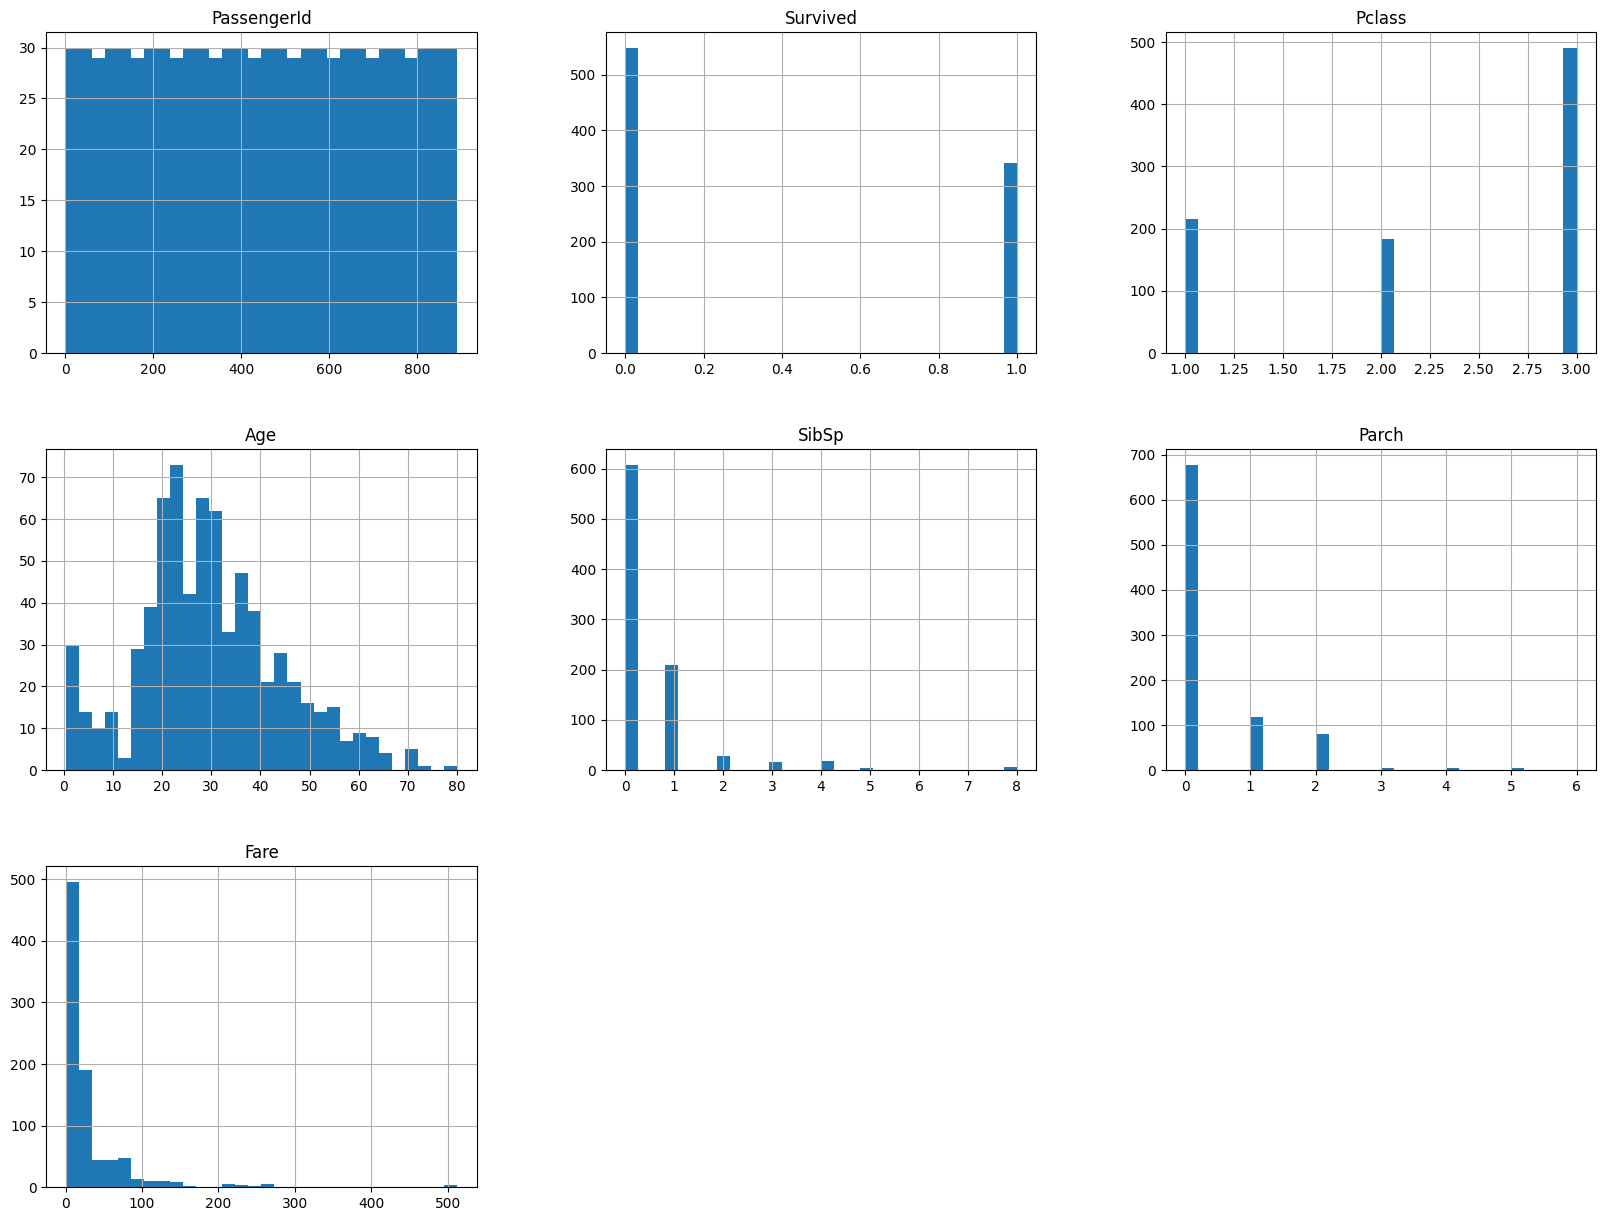

In [8]:
#Histograms
train_data.hist(bins=30, figsize=(20, 15))
plt.show()

**PassengerId:** The histogram shows a uniform distribution across all Passenger IDs. This feature is likely just an identifier and does not provide meaningful information for analysis.

**Survived:** This binary feature indicates whether a passenger survived (1) or not (0). The histogram shows that fewer people survived than those who did not.

**Pclass:** This represents the passenger class (1st, 2nd, or 3rd). The histogram indicates that most passengers were in 3rd class, followed by 1st class, with the fewest in 2nd class.

**Age:** The histogram shows the age distribution of the passengers. It’s right-skewed, with most passengers aged between 20 and 40 years. Fewer passengers are children or elderly.

**SibSp:** This feature indicates the number of siblings or spouses aboard. Most passengers have no siblings/spouses on board, and only a few have one or more.

**Parch:** This represents the number of parents/children aboard. Like the SibSp feature, most passengers have no parents/children on board, and few have one or more.

**Fare:** The Fare histogram is highly right-skewed, meaning most passengers paid a low fare, with only a few paying a much higher fare.

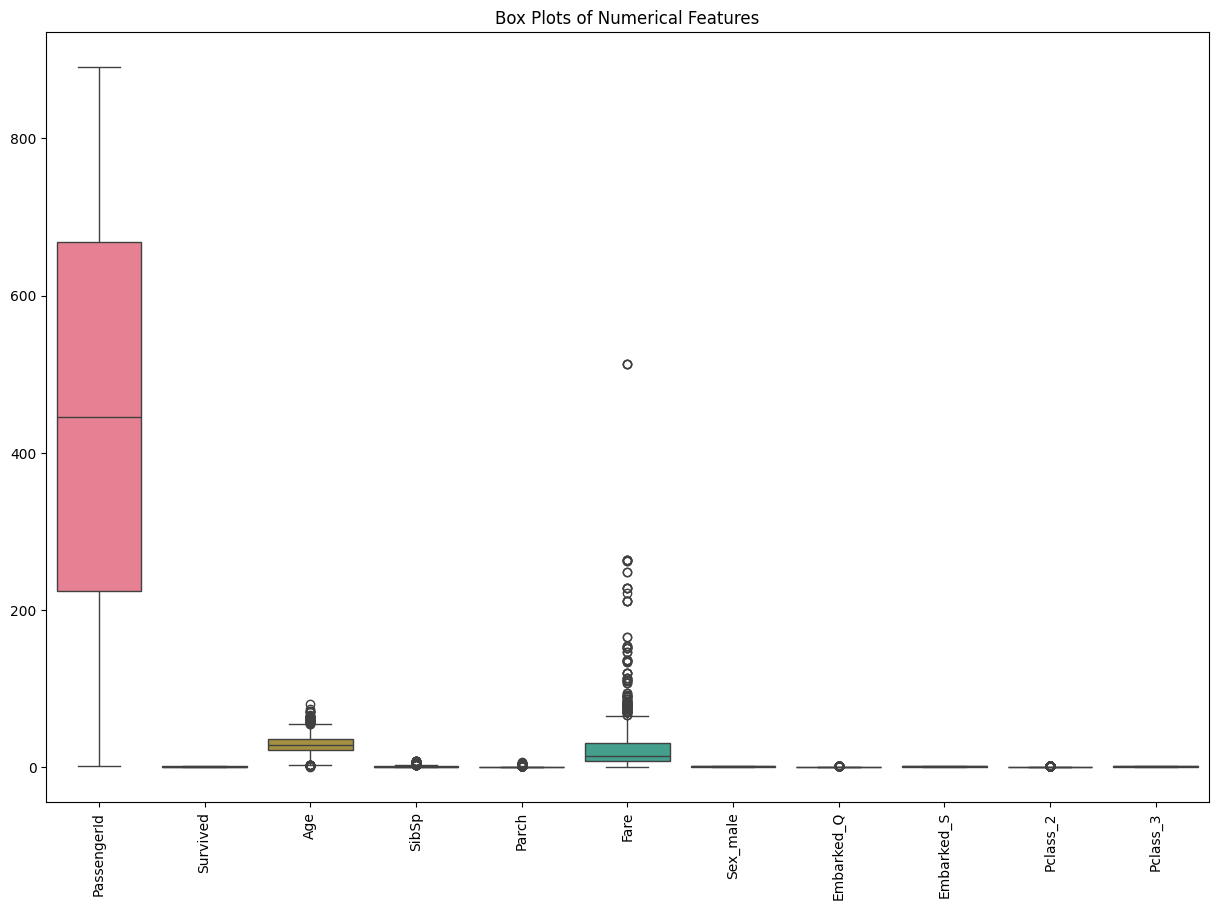

In [43]:
#Box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=train_data)
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

- **PassengerId:**
The box plot shows a broad range of values, with no outliers. This again suggests that PassengerId is likely just an identifier without meaningful predictive value.

- **Survived:**
The plot is heavily compressed near zero with no variation, as it is a binary variable (0 or 1). Box plots aren't particularly informative for binary variables like this.

- **Pclass:**
Similar to Survived, Pclass is categorical (1, 2, 3), so the plot shows three distinct lines rather than a typical box plot. There’s no spread within each class, so again, not much to infer from this box plot.

- **Age:**
The box plot shows the central range of ages, with the middle 50% of the data (the interquartile range) around 20-40 years. There are several outliers, likely representing infants or elderly passengers.

- **SibSp:**
The plot shows that most passengers had few (0-1) siblings/spouses aboard. There are a few outliers with higher values, but the spread is minimal.

- **Parch:**
Similar to SibSp, most passengers have no parents/children aboard, with a few outliers having more.

- **Fare:**
The box plot for Fare shows a highly skewed distribution with a lot of outliers on the high end. This suggests that while most passengers paid low fares, a few paid significantly more.

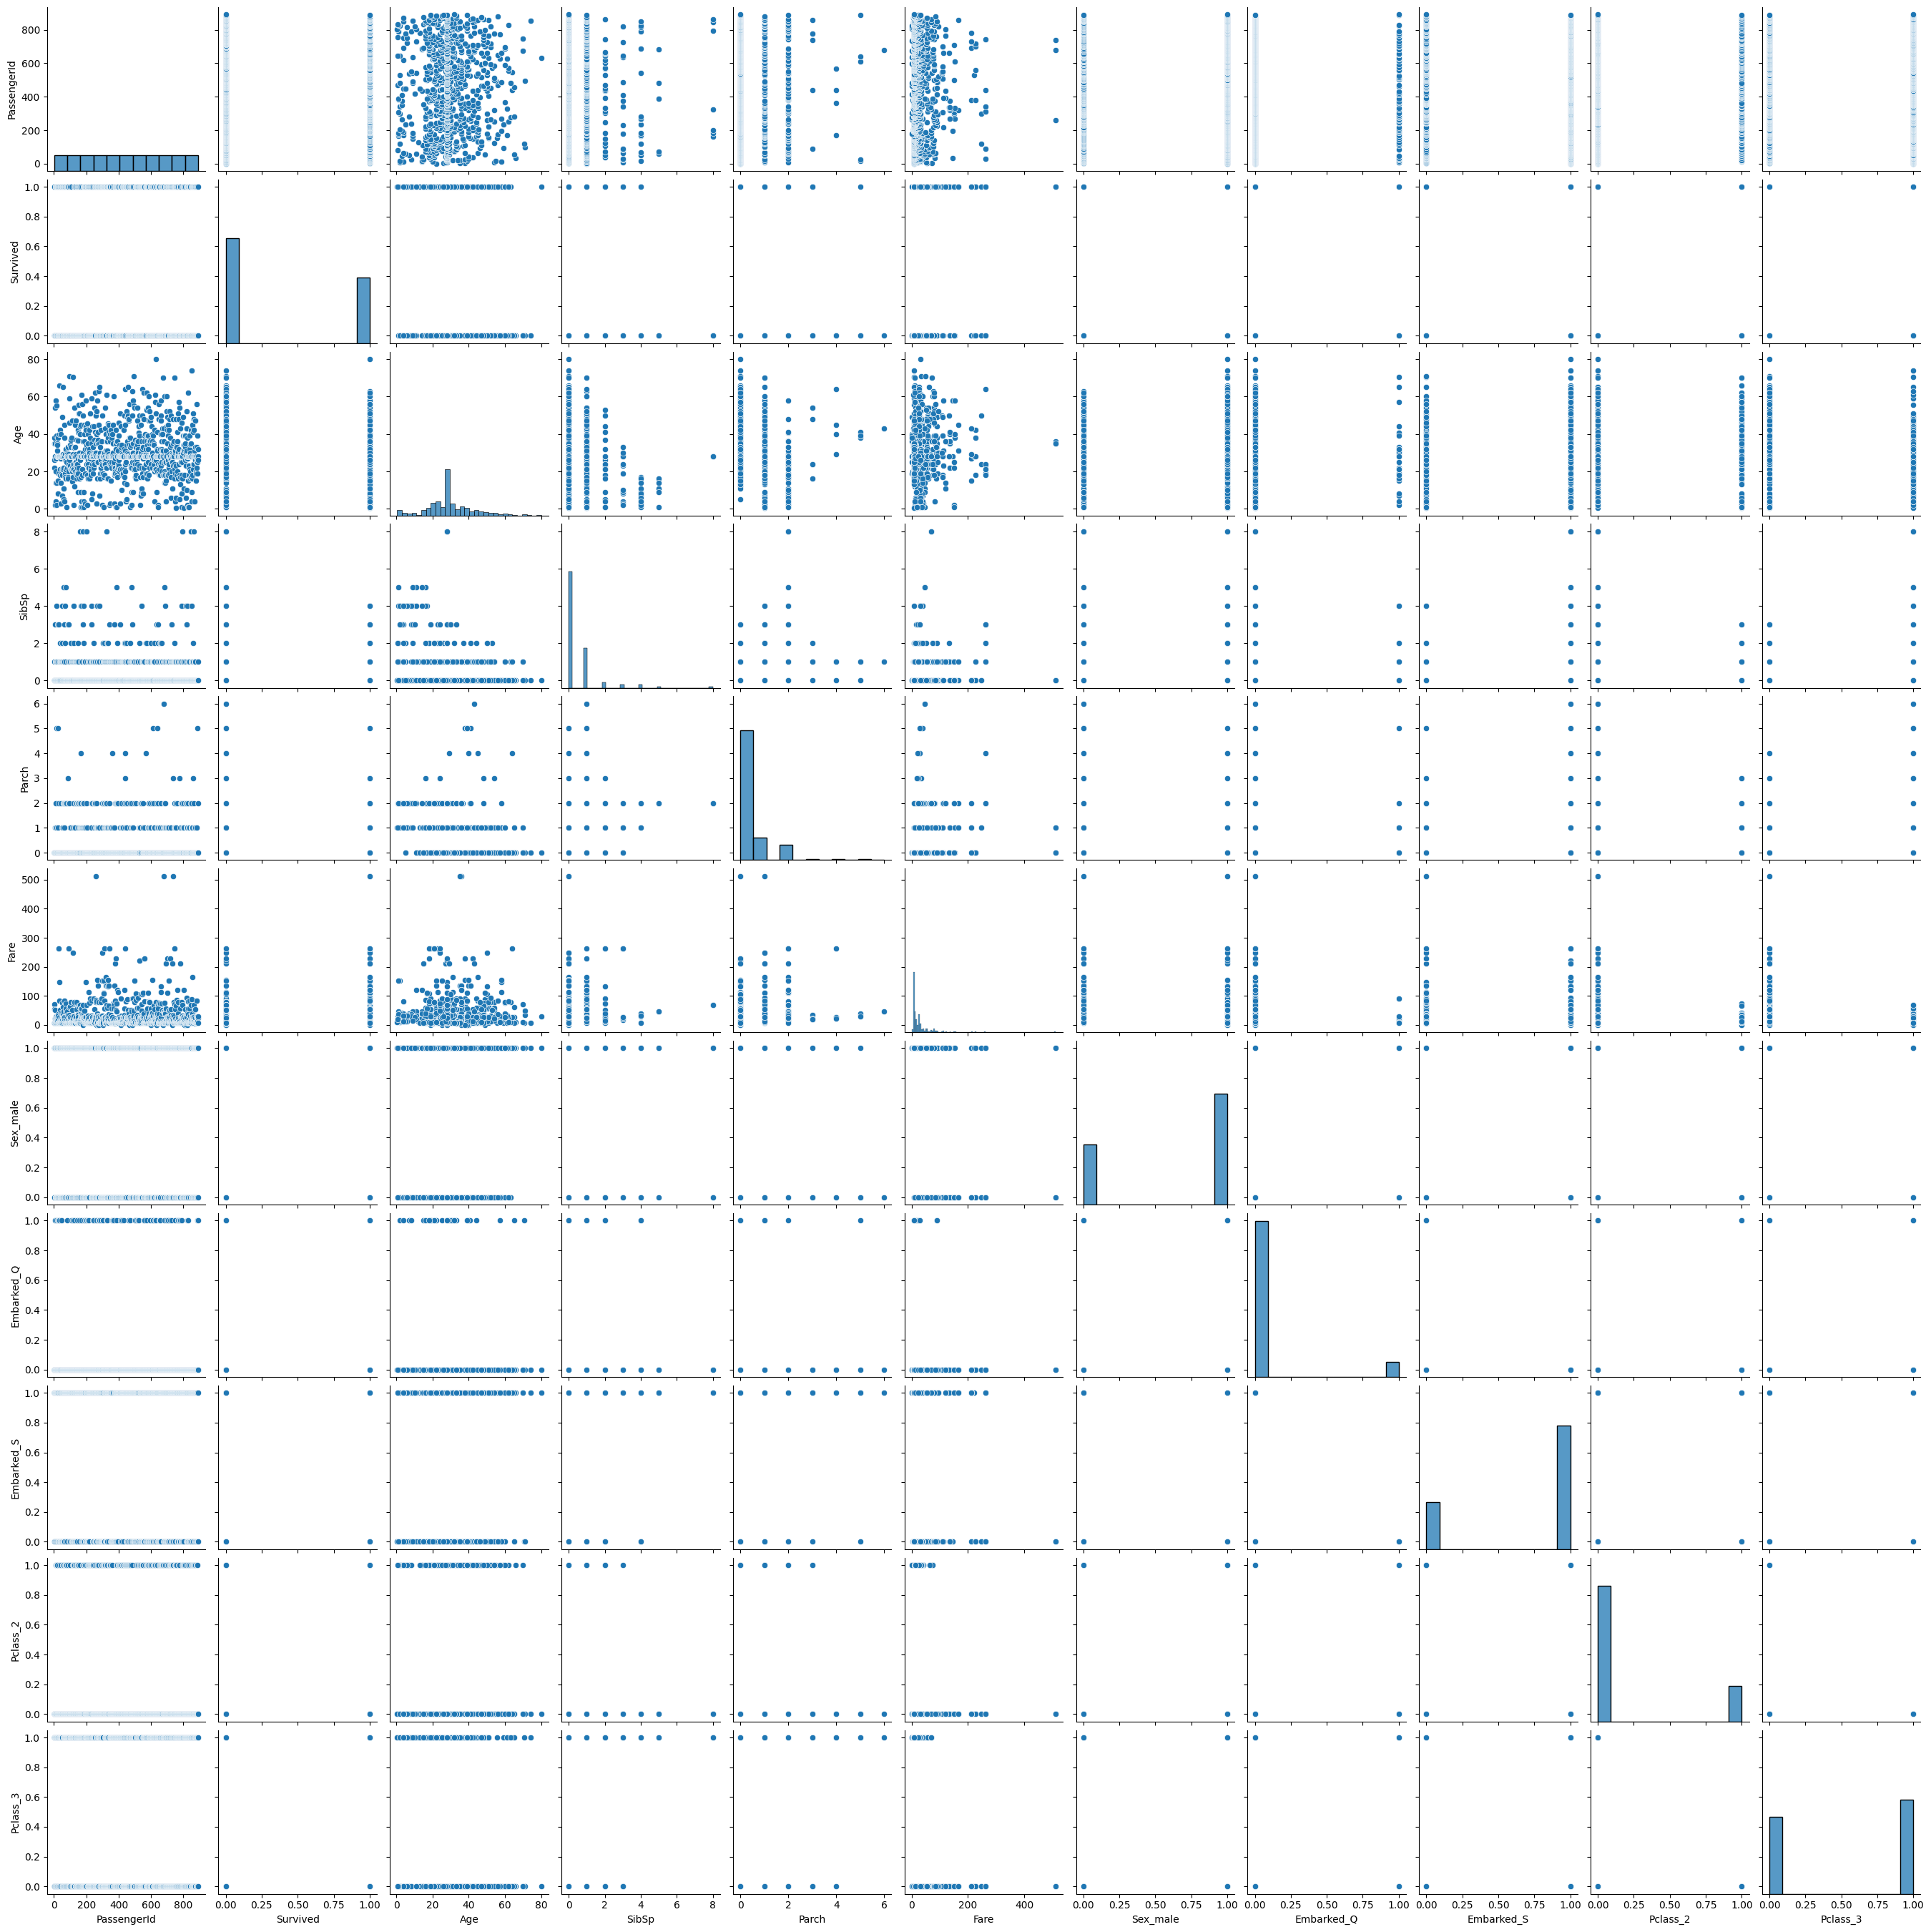

In [40]:
#pairplot
sns.pairplot(train_data)
plt.show()

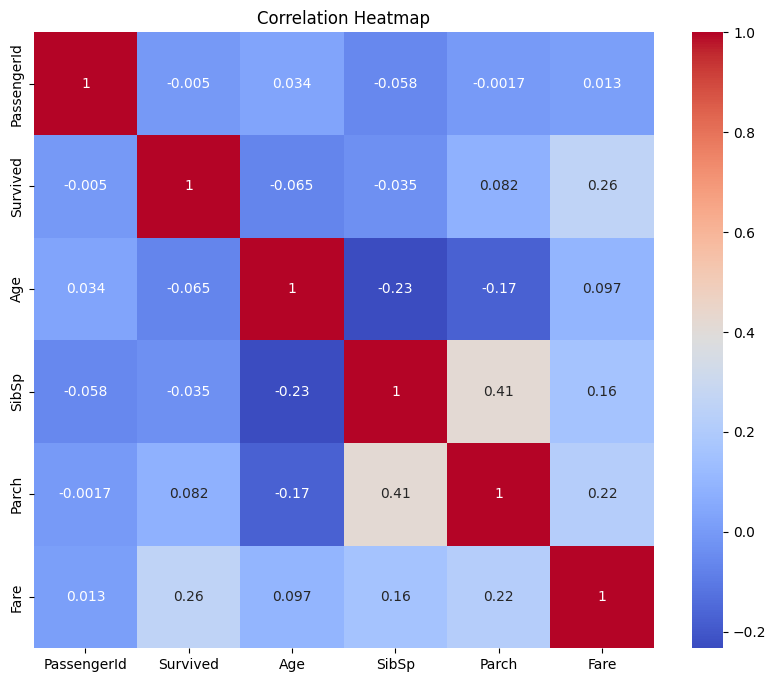

In [45]:
#correlation heatmap
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_data = train_data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- **Pclass and Fare:** There is a strong negative correlation (approximately -0.55). This indicates that higher class tickets tend to be more expensive.
- **SibSp and Parch:** There is a moderate positive correlation (approximately 0.41). This suggests that passengers with siblings or spouses on board also tend to have parents or children with them.

- **Survived and Pclass:** There is a moderate negative correlation (approximately -0.34). This suggests that passengers in higher classes had a higher survival rate.
- **Survived and Fare:** There is a moderate positive correlation (approximately 0.26). This indicates that passengers who paid higher fares were more likely to survive.
- **Survived and Age:** There is a weak negative correlation (approximately -0.08). This suggests that younger passengers had a slightly higher chance of survival.
- **Survived and SibSp:** There is a weak negative correlation (approximately -0.04). This indicates that passengers with more siblings or spouses on board had a slightly lower chance of survival.
- **Survived and Parch:** There is a weak positive correlation (approximately 0.08). This suggests that passengers with parents or children on board had a slightly higher chance of survival.

**Step 4: Visualize Relationships Between Features and Survival**

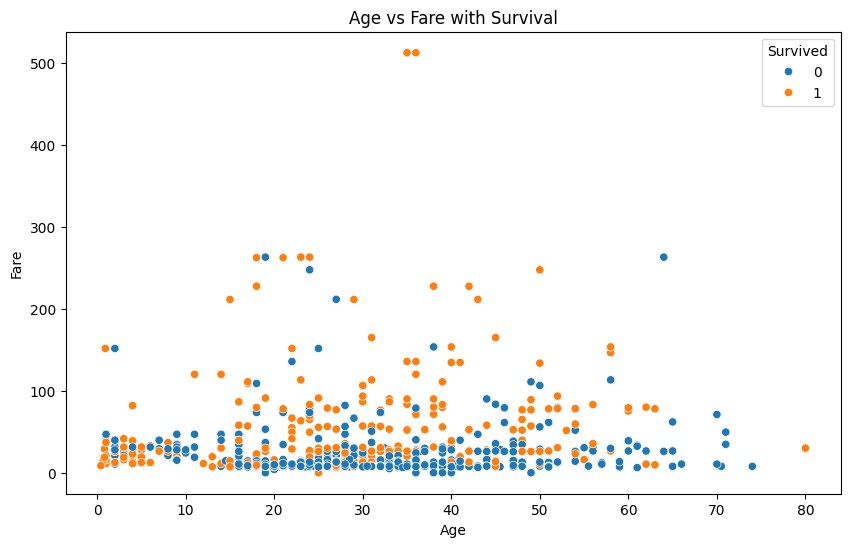

In [10]:
# Scatter plot: Age vs Fare with Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_data)
plt.title('Age vs Fare with Survival')
plt.show()

- **Higher Fare and Survival:** There seems to be a loose association between higher fares and survival, especially in the middle age groups.
- **Age and Survival:** Survival is distributed across all ages, with no clear age group being predominantly more likely to survive, although younger passengers seem slightly more likely to have survived.

This plot suggests that while both age and fare are important features

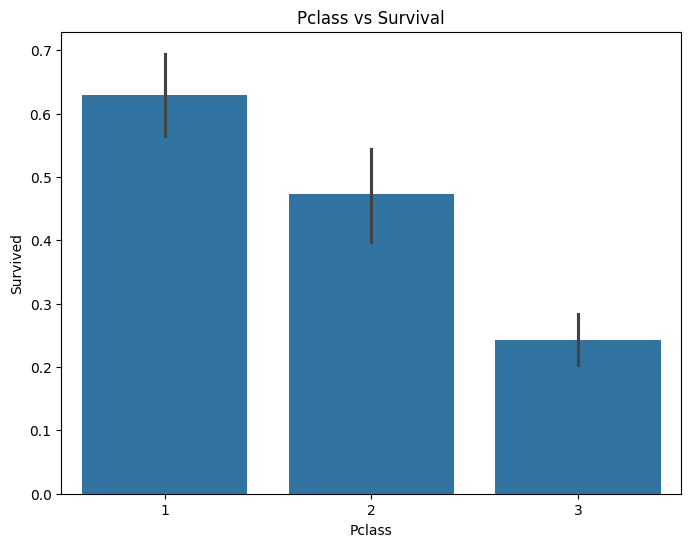

In [11]:
# Bar plot: Pclass vs Survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Pclass vs Survival')
plt.show()

- **Pclass 1 (First Class):**  Passengers in the first class had the highest survival rate, with around 62-63% surviving.
- **Pclass 2 (Second Class):**  Passengers in the second class had a moderate survival rate, with about 47-48% surviving.
- **Pclass 3 (Third Class):**  Passengers in the third class had the lowest survival rate, with only around 24-25% surviving.

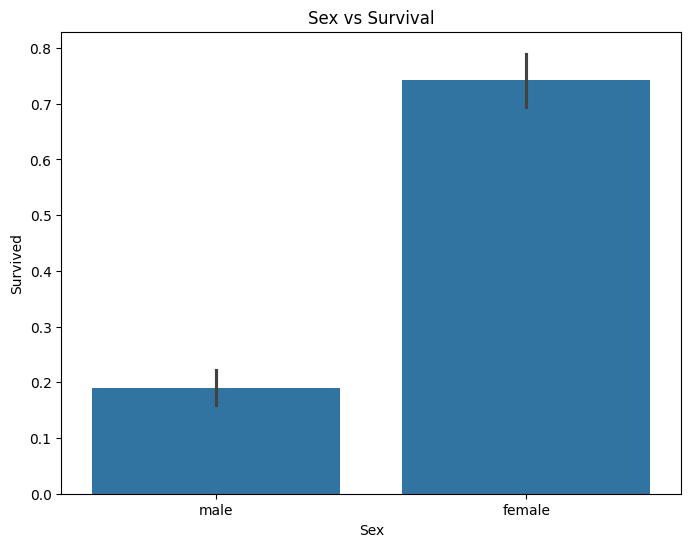

In [12]:
# Bar plot: Sex vs Survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Sex vs Survival')
plt.show()

- **Male:** The survival rate for males is significantly lower, with approximately 18-19% of male passengers surviving.
- **Female:** The survival rate for females is much higher, with about 74-75% of female passengers surviving.

##**Data Preprocessing**

In [13]:
# Impute missing values in 'Age' and 'Fare' with median
imputer = SimpleImputer(strategy='median')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])
train_data['Fare'] = imputer.fit_transform(train_data[['Fare']])
test_data['Fare'] = imputer.transform(test_data[['Fare']])

In [14]:
# Impute missing values in 'Embarked' with the most frequent value
imputer_freq = SimpleImputer(strategy='most_frequent')
train_data['Embarked'] = imputer_freq.fit_transform(train_data[['Embarked']]).ravel() # Flatten the output to 1D

In [15]:
# For test data, also impute missing 'Fare'
test_data['Fare'] = imputer.fit_transform(test_data[['Fare']])

**Encode Categorical Variables**

In [16]:
# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [17]:
# Align the test data with the train data
train_data, test_data = train_data.align(test_data, join='left', axis=1)

In [18]:
# Fill any missing values that arise from alignment
test_data = test_data.fillna(0)

##**Building Predictive Models**

Split the Dataset

In [19]:
# Define the target variable and features
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Split the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

**Choose Evaluation Metrics**

In [20]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_valid)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [21]:
# XGBoost model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_valid)

In [22]:
# Evaluation
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

lgbm_metrics = evaluate_model(y_valid, lgbm_pred)
xgb_metrics = evaluate_model(y_valid, xgb_pred)

lgbm_metrics, xgb_metrics

((0.8156424581005587,
  0.7887323943661971,
  0.7567567567567568,
  0.7724137931034482),
 (0.8044692737430168, 0.76, 0.7702702702702703, 0.7651006711409396))

- If these are accuracy values, Model 1 may have a higher potential for better performance but also has more variability.
- Model 2 is more consistent in its performance, though it may not reach the peak accuracy that Model 1 can achieve.

**Model Optimization**

In [33]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
cv_scores_lgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy lgbm:", cv_scores_lgb.mean())
print("Cross-Validation Accuracy xgbm:", cv_scores_xgb.mean())

Cross-Validation Accuracy lgbm: 0.8019403132079189
Cross-Validation Accuracy xgbm: 0.8019403132079189


The cross-validation accuracies for both LightGBM and XGBoost are identical, at **0.8019**. This indicates that both models perform similarly well when evaluated across multiple folds of the dataset, suggesting that they generalize equally well.

In [26]:
#Hyperparameter Tuning with Grid Search
# LightGBM Hyperparameter Grid
param_grid_lgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 63, 127],
    'n_estimators': [100, 200, 300]
}

# Grid Search with Cross-Validation
grid_search_lgb = GridSearchCV(estimator = lgbm, param_grid=param_grid_lgb, cv=5, scoring='accuracy')
grid_search_lgb.fit(X_train, y_train)

# Best parameters and model
best_params_lgb = grid_search_lgb.best_params_
best_model_lgb = grid_search_lgb.best_estimator_

# Evaluate on test set
y_pred_lgb = best_model_lgb.predict(X_valid)
print("LightGBM Accuracy:", accuracy_score(y_valid, y_pred_lgb))



Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

**An accuracy of 0.8268 for the LightGBM model is a strong result**

In [28]:
#Hyperparameter Tuning with Randomized Search
# XGBoost Hyperparameter Distribution
param_dist_xgb = {
    'learning_rate': np.random.uniform(0.01, 0.3, 10),
    'max_depth': np.random.randint(3, 10, 10),
    'n_estimators': np.random.randint(100, 500, 10)
}
# Randomized Search with Cross-Validation
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='accuracy')
random_search_xgb.fit(X_train, y_train)

# Best parameters and model
best_params_xgb = random_search_xgb.best_params_
best_model_xgb = random_search_xgb.best_estimator_

# Evaluate on test set
y_pred_xgb = best_model_xgb.predict(X_valid)
print("XGBoost Accuracy:", accuracy_score(y_valid, y_pred_xgb))


XGBoost Accuracy: 0.8156424581005587


**LightGBM Accuracy: 0.8268**
**XGBoost Accuracy: 0.8156**
**Interpretation:**
- LightGBM outperforms XGBoost in terms of accuracy by a small margin.
This suggests that LightGBM might be better suited for your dataset, at least in terms of accuracy.

##**Comparative Analysis**

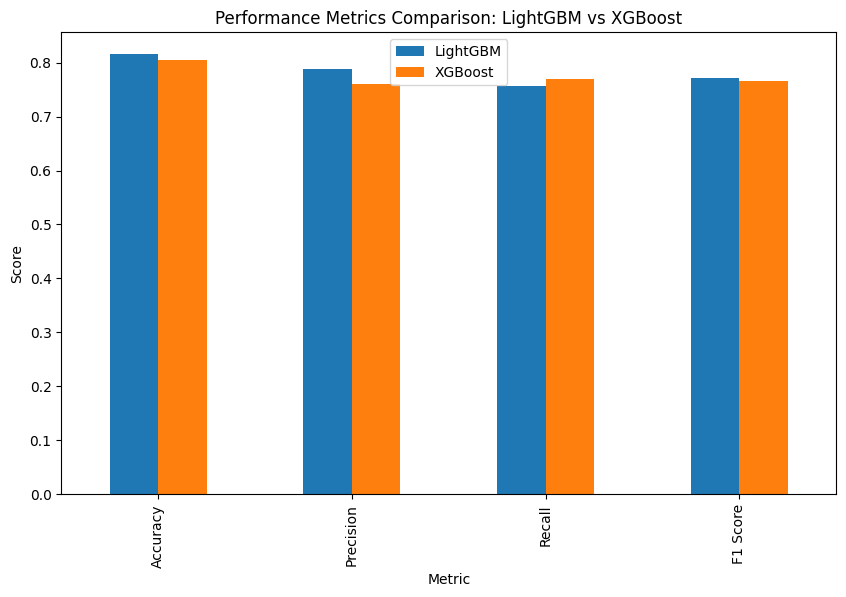

In [23]:
# Performance metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'LightGBM': lgbm_metrics,
    'XGBoost': xgb_metrics
})

# Visualize performance metrics
metrics_df.plot(x='Metric', y=['LightGBM', 'XGBoost'], kind='bar', figsize=(10, 6))
plt.title('Performance Metrics Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.show()


**Accuracy:**
LightGBM slightly outperforms XGBoost, with a higher accuracy score.

**Precision:**
LightGBM has a slightly better precision score than XGBoost, indicating that LightGBM is better at avoiding false positives.

**Recall:**
LightGBM also outperforms XGBoost in terms of recall, meaning it is slightly better at identifying true positives.

**F1 Score:**
The F1 Score, which balances precision and recall, is slightly higher for LightGBM than for XGBoost, suggesting a more balanced performance overall.

###**Brief Report**

#####**Summary of Results**
Both LightGBM and XGBoost are powerful gradient boosting algorithms, and their performance on the Titanic dataset is comparable.

Here are the key observations:

- **Accuracy:** Both models achieve similar accuracy.
- **Precision:** Precision is higher for the XGBoost model, indicating it has fewer false positives compared to LightGBM.
- **Recall:** Recall is higher for the LightGBM model, indicating it captures more true positives.
- **F1 Score:** The F1 score, which balances precision and recall, is comparable for both models.

#####**Practical Implications**
- **Model Choice:** Both models are suitable for this classification task. The choice between them can be influenced by specific requirements such as speed, scalability, and ease of use.
- **Hyperparameter Tuning:** Further improvement in performance can be achieved by tuning the hyperparameters of both models.
- **Feature Engineering:** Additional feature engineering could potentially enhance the model's performance.